# Logistic regression

In [1]:
#import libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#read the data

In [43]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\bank-additional-full.csv")
#df=pd.read_csv("bank-additional-full.csv")
#df = pd.read_csv("C:\\Users\\Dell\\Downloads\\bank-additional-full.csv")
#df = pd.read_csv("C:/Users/Dell/Downloads/bank-additional-full.csv")

In [44]:
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41194,"74;""retired"";""married"";""professional.course"";""..."
41195,"74;NA;""married"";""professional.course"";""no"";""ye..."
41196,"74;""retired"";""married"";NA;""no"";""yes"";""no"";""cel..."
41197,NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;N...


In [45]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\bank-additional-full.csv",sep=";")

In [46]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data.shape

(41199, 21)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 41199 entries, 0 to 41198

Data columns (total 21 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   age             41195 non-null  float64

 1   job             41194 non-null  object 

 2   marital         41194 non-null  object 

 3   education       41194 non-null  object 

 4   default         41195 non-null  object 

 5   housing         41196 non-null  object 

 6   loan            41195 non-null  object 

 7   contact         41195 non-null  object 

 8   month           41196 non-null  object 

 9   day_of_week     41196 non-null  object 

 10  duration        41196 non-null  float64

 11  campaign        41196 non-null  float64

 12  pdays           41196 non-null  float64

 13  previous        41196 non-null  float64

 14  poutcome        41194 non-null  object 

 15  emp.var.rate    41196 non-null  float64

 16  cons.price.idx  41195 non-null  float64

 17  cons.conf

In [49]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [50]:
data.dropna(inplace = True)

In [51]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [52]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [53]:
data.duplicated().sum()

13

In [54]:
data.drop_duplicates(inplace = True)

In [55]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [56]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [57]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [58]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [59]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41184     no
41185     no
41186    yes
41187     no
41193     no
Name: y, Length: 41177, dtype: object

In [60]:
#in dependent columns we are having yes and no
#yes-->1
#no--->0
data['y'] = np.where(data['y']=="yes",1,0)
data['y'] = data['y'].astype(str)

In [61]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 41177 entries, 0 to 41193

Data columns (total 21 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   age             41177 non-null  float64

 1   job             41177 non-null  object 

 2   marital         41177 non-null  object 

 3   education       41177 non-null  object 

 4   default         41177 non-null  object 

 5   housing         41177 non-null  object 

 6   loan            41177 non-null  object 

 7   contact         41177 non-null  object 

 8   month           41177 non-null  object 

 9   day_of_week     41177 non-null  object 

 10  duration        41177 non-null  float64

 11  campaign        41177 non-null  float64

 12  pdays           41177 non-null  float64

 13  previous        41177 non-null  float64

 14  poutcome        41177 non-null  object 

 15  emp.var.rate    41177 non-null  float64

 16  cons.price.idx  41177 non-null  float64

 17  cons.conf

In [63]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [64]:
col_list=list(data.columns)

In [65]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [66]:
#outlier

In [67]:
col_list.remove('y')

In [68]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

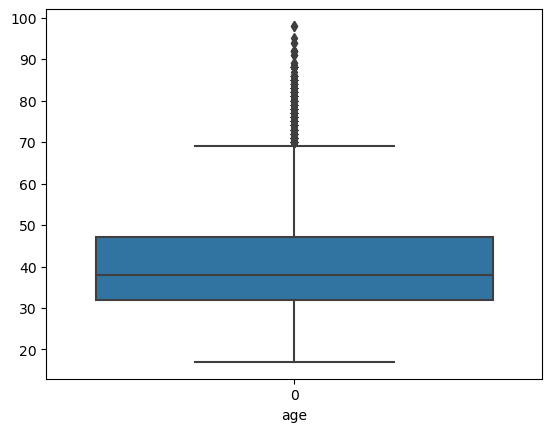

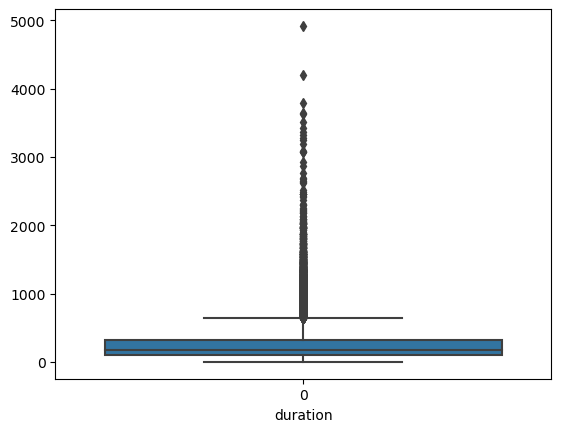

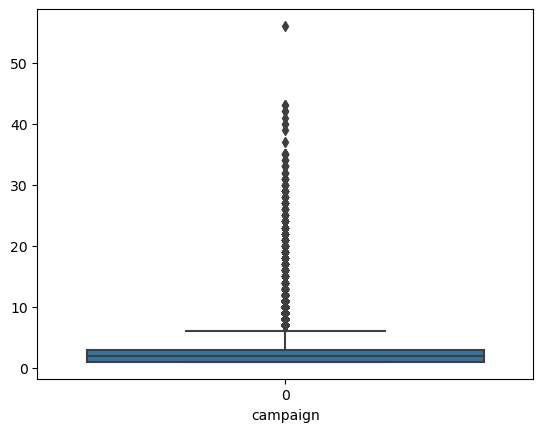

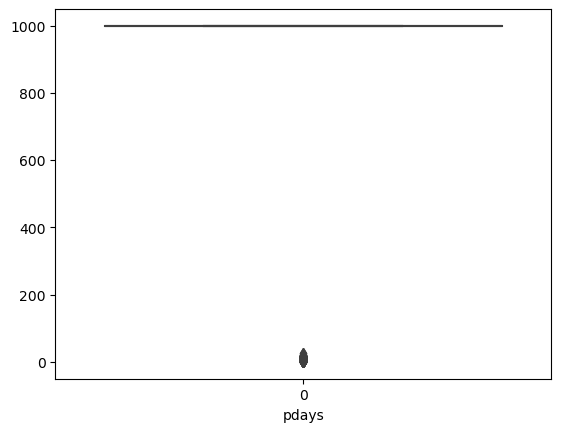

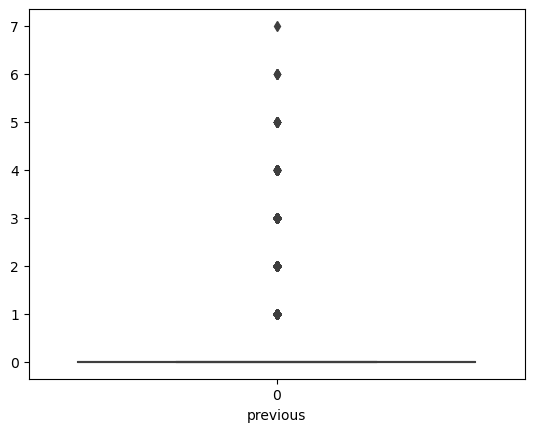

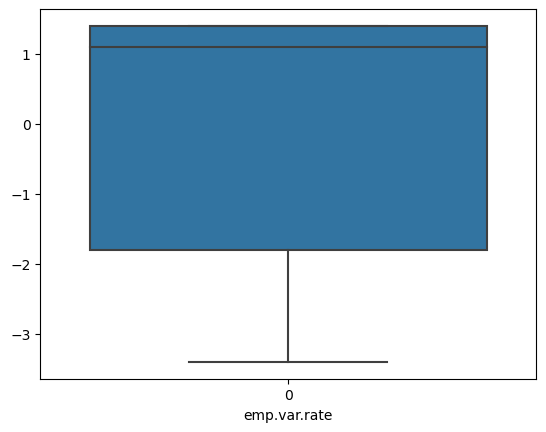

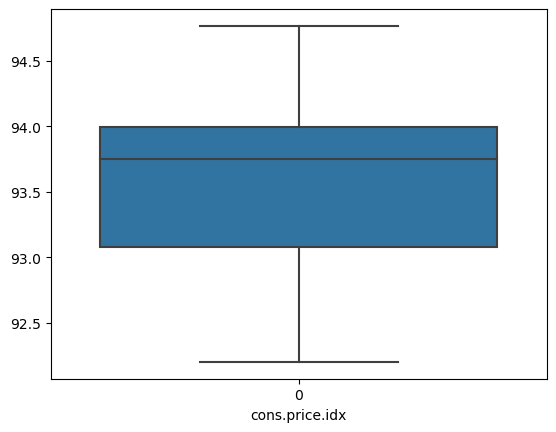

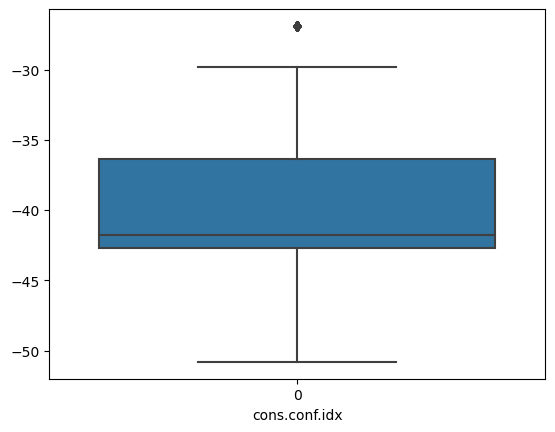

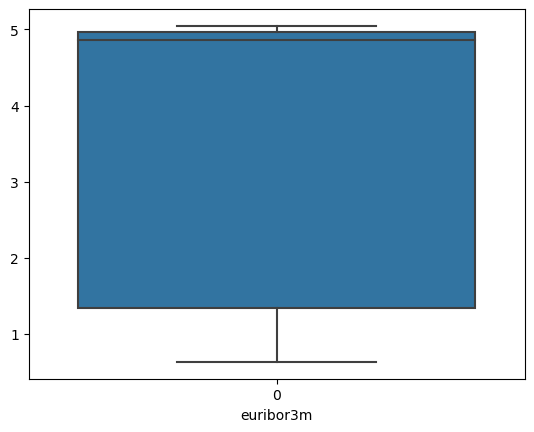

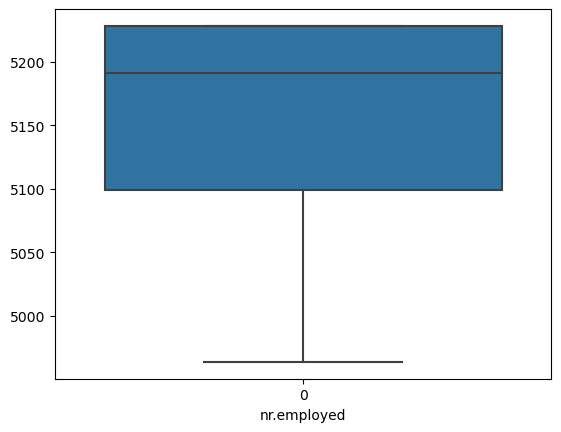

In [69]:
for i in col_list:
    if data[i].dtype!='object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [70]:
data['pdays'].value_counts()

999.0    39662
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: pdays, dtype: int64

In [71]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]

Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]


Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data.previous.quantile(0.25)
Q3 = data.previous.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.previous >= Q1 - 1.5*IQR) & (data.previous <= Q3 + 1.5*IQR)]

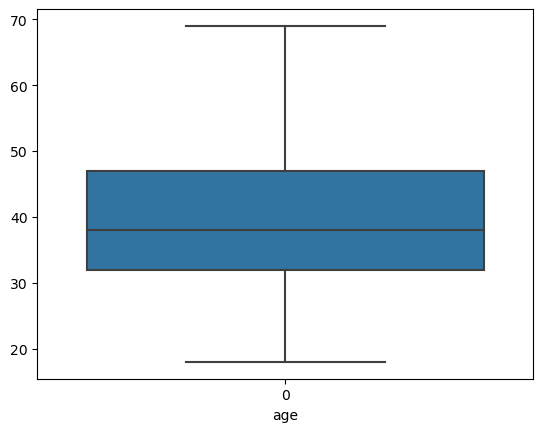

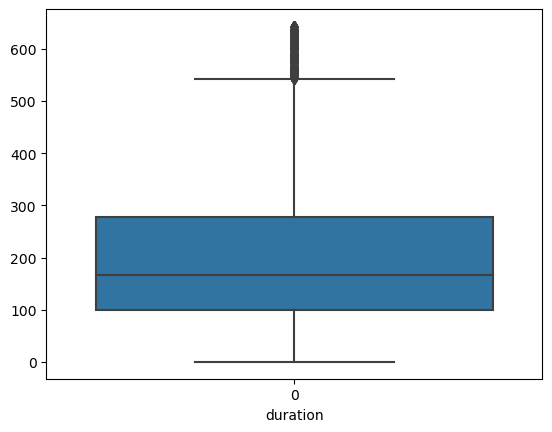

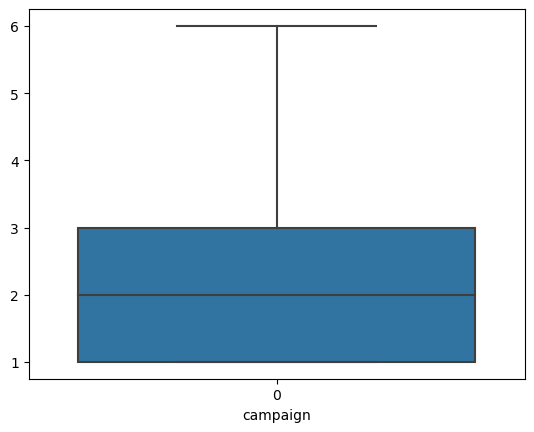

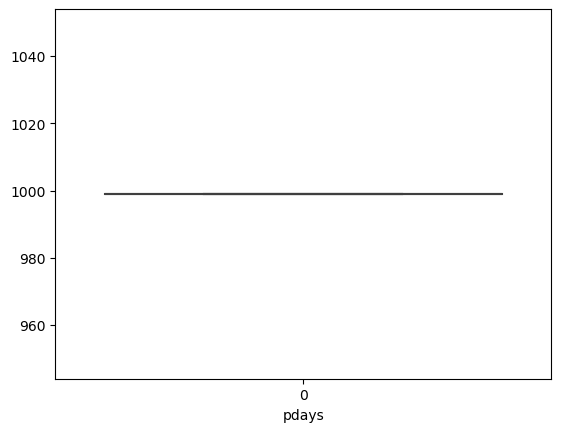

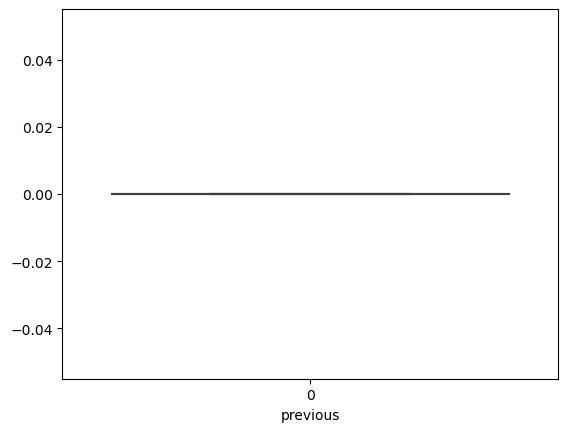

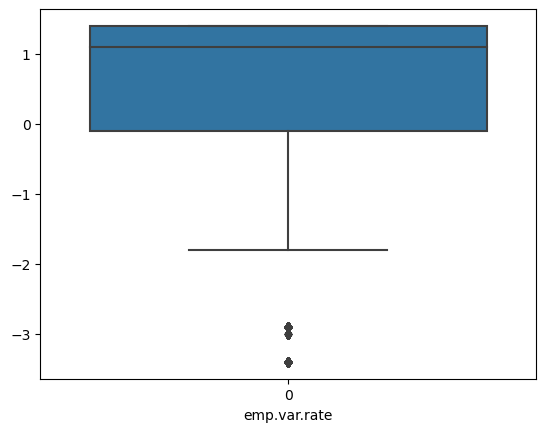

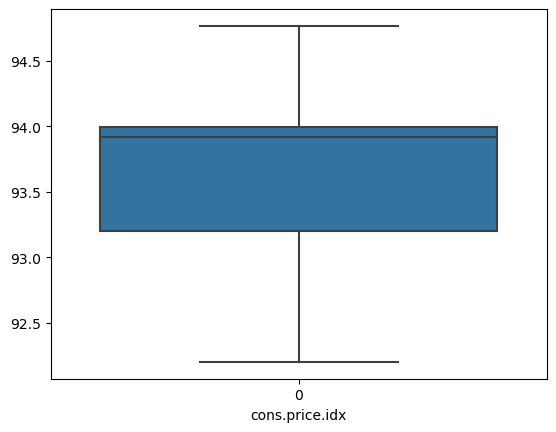

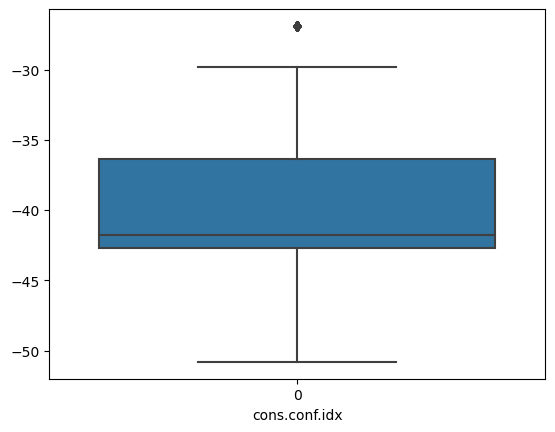

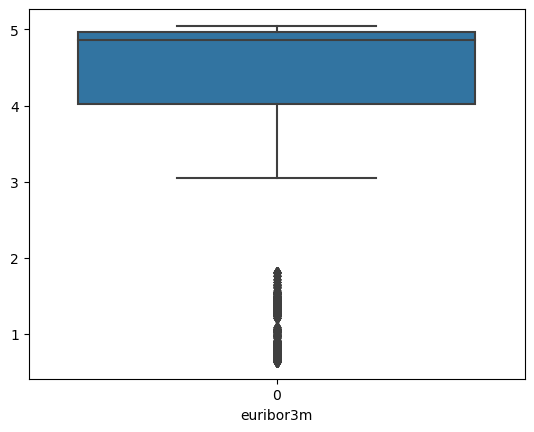

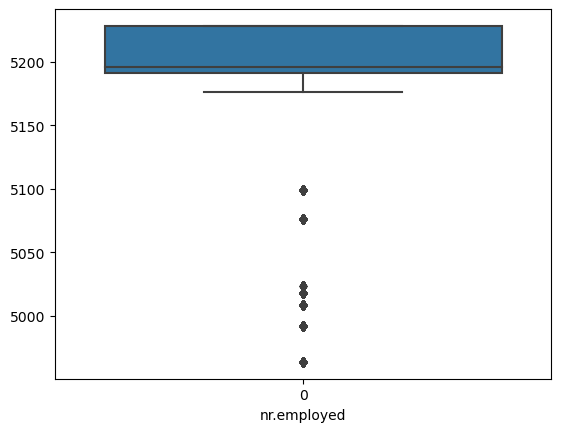

In [72]:
for i in col_list:
    
    if data[i].dtype!='object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [73]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == "object")):
        col_list.append(col)

In [74]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [75]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
for i in col_list:
    data[i]=l1.fit_transform(data[i])

In [76]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,0,1,6,0,0,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 30562 entries, 0 to 41186

Data columns (total 21 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   age             30562 non-null  float64

 1   job             30562 non-null  int32  

 2   marital         30562 non-null  int32  

 3   education       30562 non-null  int32  

 4   default         30562 non-null  int32  

 5   housing         30562 non-null  int32  

 6   loan            30562 non-null  int32  

 7   contact         30562 non-null  int32  

 8   month           30562 non-null  int32  

 9   day_of_week     30562 non-null  int32  

 10  duration        30562 non-null  float64

 11  campaign        30562 non-null  float64

 12  pdays           30562 non-null  float64

 13  previous        30562 non-null  float64

 14  poutcome        30562 non-null  int32  

 15  emp.var.rate    30562 non-null  float64

 16  cons.price.idx  30562 non-null  float64

 17  cons.conf

In [78]:
#vif

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,age,1.229814
1,job,1.025162
2,marital,1.183851
3,education,1.100877
4,default,1.113206
5,housing,1.013009
6,loan,1.003037
7,contact,2.632532
8,month,2.068911
9,day_of_week,1.011112


In [80]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,0,1,6,0,0,0,0,7,0,254.0,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [81]:
data = data.drop(['pdays'],axis=1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,22.626740
1,job,2.097145
2,marital,5.622433
3,education,4.470246
4,default,1.435466
5,housing,2.193007
6,loan,1.208189
7,contact,3.529308
8,month,7.940998
9,day_of_week,3.107694


In [83]:
data = data.drop(['nr.employed'],axis=1)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,22.626458
1,job,2.097111
2,marital,5.621457
3,education,4.470221
4,default,1.434241
5,housing,2.192341
6,loan,1.208088
7,contact,2.713605
8,month,6.823188
9,day_of_week,3.106999


In [85]:
data = data.drop(['cons.price.idx'],axis=1)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,20.778753
1,job,2.088313
2,marital,5.381394
3,education,4.389657
4,default,1.433996
5,housing,2.187813
6,loan,1.207400
7,contact,2.501098
8,month,6.567643
9,day_of_week,3.083330


In [87]:
data = data.drop(['euribor3m'],axis=1)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,17.117513
1,job,2.078454
2,marital,5.118300
3,education,4.193633
4,default,1.432456
5,housing,2.178409
6,loan,1.207103
7,contact,2.498953
8,month,5.748833
9,day_of_week,3.036310


In [89]:
data = data.drop(['cons.conf.idx'],axis=1)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,9.667457
1,job,2.068695
2,marital,4.119847
3,education,4.049928
4,default,1.432437
5,housing,2.138764
6,loan,1.203752
7,contact,2.476174
8,month,5.365763
9,day_of_week,2.957351


In [91]:
data = data.drop(['age'],axis=1)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\Dell\Documents\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide

  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,job,2.027853
1,marital,4.113926
2,education,3.731904
3,default,1.336959
4,housing,2.066804
5,loan,1.199180
6,contact,2.474915
7,month,4.889821
8,day_of_week,2.818377
9,duration,2.812577


In [93]:
data = data.drop(['previous','poutcome'],axis=1)

In [94]:
data

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,y
0,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1,0
1,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1,0
2,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1,0
3,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1,0
4,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254.0,2.0,-1.1,0
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,-1.1,1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,-1.1,0
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,-1.1,0


In [96]:
x=list(vif_data.feature)

In [97]:
x

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'emp.var.rate']

In [99]:
ind_feat = data.drop(columns='y')

In [100]:
ind_feat

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254.0,2.0,-1.1
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,-1.1


In [101]:
dep_feat=data['y']

In [102]:
dep_feat

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41181    1
41184    0
41185    0
41186    1
Name: y, Length: 30562, dtype: int32

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [113]:
x_train,x_test,y_train,y_test = train_test_split(ind_feat,dep_feat,train_size=0.8)

In [114]:
log_model = LogisticRegression()

In [115]:
log_model.fit(x_train,y_train)

C:\Users\Dell\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred = log_model.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [118]:
ac = accuracy_score(y_test,y_pred)

In [119]:
ac

0.939800425323082

In [120]:
#-->94%

In [121]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5681,   68],
       [ 300,   64]], dtype=int64)

In [122]:
#(Tp+Tn)/(Tp+Tn+Fp+Fn)
(5722+49)/(5722+36+306+49)

0.9440536561426468